# Support Vector Machines

မင်္ဂလာပါ။ Data Science Using Python -- Week 17 က ကြိုဆိုပါတယ်။ 

ဒီတပါတ် အစီအစဉ်ကတော့ ... 

* Support Vector Machines
* Dimensionality Reduction နဲ့
* Boosting Models (more trees) တို့ပဲ ဖြစ်ပါတယ်။

In [9]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics, model_selection as ms

In [19]:
# import some data to play with
X_all, Y_all = datasets.load_iris(as_frame=True, return_X_y=True)
selector = Y_all.isin([0, 1])
X = X_all.values[selector, :2]  
Y = Y_all[selector]
# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset

In [20]:
X_all.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(X, Y)

In [22]:
model = svm.SVC(kernel="linear", C=100, degree=2, gamma="auto", shrinking=True, max_iter=10, decision_function_shape="ovo", random_state=42)
model.fit(tr_X, tr_y)

/home/edward/anaconda3/envs/py37-dsup/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(C=100, decision_function_shape='ovo', degree=2, gamma='auto',
    kernel='linear', max_iter=10, random_state=42)

In [23]:
pred_y = model.predict(ts_X)
print (metrics.classification_report(ts_y, pred_y))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.94      0.94      0.94        17

    accuracy                           0.92        25
   macro avg       0.91      0.91      0.91        25
weighted avg       0.92      0.92      0.92        25



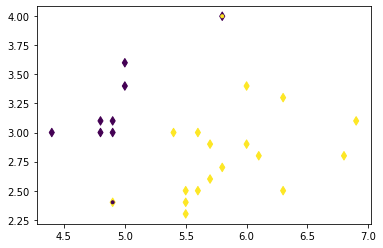

In [24]:
plt.scatter(ts_X[:, 0], ts_X[:, 1], c=ts_y, marker="d")
plt.scatter(ts_X[:, 0], ts_X[:, 1], c=pred_y, marker=".")
plt.show()

### Parameters 

C : float, default=1.0; 
    * Regularization parameter. 1/alpha as we knew before

kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'
    * If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples). Something like a distance matrix.

degree : int, default=3
    * Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.

gamma : {'scale', 'auto'} or float, default='scale'
    * Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    * if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
    * if 'auto', uses 1 / n_features.

shrinking : bool, default=True
    * Whether to use the shrinking heuristic. 

cache_size : float, default=200
    * Specify the size of the kernel cache (in MB).

max_iter : int, default=-1
    * Hard limit on iterations within solver, or -1 for no limit.

decision_function_shape : {'ovo', 'ovr'}, default='ovr'

random_state : int, RandomState instance or None, default=None

In [32]:
# let's try a regression one
df_X, ds_y = datasets.fetch_california_housing(as_frame=True, return_X_y=True)
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(df_X, ds_y)
model = svm.SVR(kernel="rbf", degree=5, gamma="auto", C=1000, shrinking=True, max_iter=100)
model.fit(tr_X, tr_y)
pred = model.predict(ts_X)
metrics.r2_score(ts_y, pred)

/home/edward/anaconda3/envs/py37-dsup/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


-0.3522473858277748

## How it works

It essentially **increase the dimensionality** of the data to better fit in.

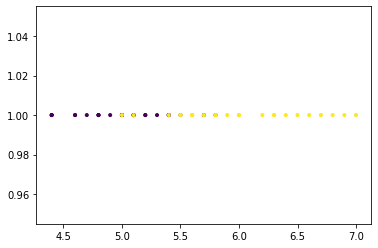

In [53]:
from scipy import stats
from sklearn import linear_model

X_all, Y_all = datasets.load_iris(as_frame=True, return_X_y=True)
selector = Y_all.isin([0, 1])
X = X_all.values[selector, :1]  
Y = Y_all[selector]

#x = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
#y = np.ones(len(x))

xx = X[::2]
yy = np.ones(len(xx))

plt.scatter(xx, yy, marker=".", c=Y[::2])
plt.show()

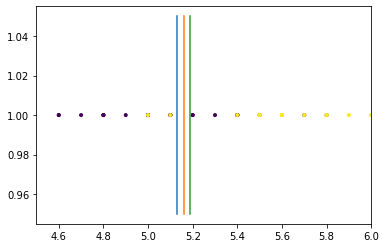

In [58]:
# let's zoom in
plt.scatter(xx, yy, marker=".", c=Y[::2])
plt.xlim(4.5, 6.0)
plt.plot([5.13, 5.13], [0.95, 1.05])
plt.plot([5.16, 5.16], [0.95, 1.05])
plt.plot([5.19, 5.19], [0.95, 1.05])
plt.show()

အပေါ်က မော်ဒယ်အားလုံး `classification_report` အားဖြင့်ဆိုရင် တူတူပဲ။ 

ဒီတော့ သူတို့ထဲမှာ ဘယ်ဟာ အကောင်းဆုံးလဲဆိုတာ သိဖို့ cross_validation နဲ့ အခါခါ စစ်ပြီး margin ကို ကျယ်အောင် ထားရတယ်။ margin အတွင်းမှာ ကျနေတဲ့ data point တွေကို **support vector** လို့ခေါ်ပြီး ရလာတဲ့ classifier/regressor ကို support vector classifier လို့ ခေါ်တယ်။ 

support vector classifier တွေဟာ ဒီအတိုင်းထားရင် linear model ပဲ ဖြစ်နေလိမ့်မယ်။ ဒါကြောင့် $x$ ကို $(x, x^2)$ အဖြစ်ကို ပြောင်းလိုက်တယ်။ ဒီတော့ dimension က 2 ဖြစ်သွားတယ်။ 

တကယ့် formula က ... 

$$(a \times b + \gamma)^d$$

ဖြစ်တယ်။ $\gamma$ ဟာ `gamma` ပဲ။ 

သင်္ချာတွေ အများကြီး မပါပဲ ပြောရရင် ... 

* `kernel` = `"linear"` ဟာ degree $d$ = 1 ဖြစ်တယ်။ linear model နဲ့ တူတူပဲ။ 

* `kernel` = `"poly"` မှာ degree $n \geq d \geq 1$, where $n$ is an integer ဖြစ်တယ်။

* `kernel` = `"rbf"` မှာ degree $d = \infty$ ဖြစ်တယ်။ သင်္ချာ ဖော်မြူလာအရ $e^{-\gamma(a-b)^2}$ လို့ ရေးပေမဲ့ ... 
  
  $$\lim_{d \to \infty} (a \times b + \gamma)^d = e^{-\gamma(a-b)^2}$$
  မို့လို့ တူတူပဲ

**Assignment**

SVM ကိုသုံးပြီး digit နဲ့ mnist dataset တွေကို စမ်းကြည့်ကြပါ။